New Change (Feb 15 2019): Download multiprocessing to run new spotfuncs `get_lyrics()`

Open Terminal

`pip install multiprocess`

https://pypi.org/project/multiprocess/

In [1]:
import spotipy
spotify = spotipy.Spotify()
import sys
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
from bs4 import BeautifulSoup
import lxml
import spotfuncs 
import requests
import pandas as pd
import numpy as np
from multiprocessing import Pool

In [2]:
import nltk
from nltk.tokenize import TweetTokenizer

In [3]:
filepath = "/Users/ajaypatel21/genius.txt"

In [4]:
#artist_id = spotfuncs.search_genius("Travis Scott", credentials_file=filepath)
#genius_songs = spotfuncs.get_songs(artist_id, credentials_file=filepath)

In [65]:
#genius_songs

{'100 Bottles': (365455, 'https://genius.com/Low-pros-100-bottles-lyrics'),
 '100 Bottles (Remix)': (423013,
  'https://genius.com/Low-pros-100-bottles-remix-lyrics'),
 '10 2 10': (149974, 'https://genius.com/Big-sean-10-2-10-lyrics'),
 '10 2 10 (Remix)': (270814,
  'https://genius.com/Big-sean-10-2-10-remix-lyrics'),
 '12 Disciples': (181385,
  'https://genius.com/Travis-scott-12-disciples-lyrics'),
 '16 Chapels': (99717, 'https://genius.com/Travis-scott-16-chapels-lyrics'),
 '16 year old Home Studio Freestyle': (2462597,
  'https://genius.com/Travis-scott-16-year-old-home-studio-freestyle-lyrics'),
 '1st Quarter Freestyle': (350656,
  'https://genius.com/Big-sean-1st-quarter-freestyle-lyrics'),
 '2018 Grammys Performance': (3477888,
  'https://genius.com/Kendrick-lamar-2018-grammys-performance-lyrics'),
 '2 Fucks': (149629, 'https://genius.com/Hustle-gang-2-fucks-lyrics'),
 '3500': (2027385, 'https://genius.com/Travis-scott-3500-lyrics'),
 '3 Wayz': (2475121, 'https://genius.com/Ty-d

In [6]:
#name = "SICKO MODE"
#url = genius_songs["SICKO MODE"][1]

#lyrics = spotfuncs.get_lyrics(url)

#print(name, '\n')
#print(lyrics)

SICKO MODE 

Astro, yeah Sun is down, freezin' cold That's how we already know, winter's here My dawg would probably do it for a Louis belt That's just all he know, he don't know nothin' else I tried to show 'em, yeah I tried to show 'em, yeah, yeah Yeah, yeah, yeah Goin' on you with the pick and roll Young La Flame, he in sicko mode The Notorious B.I.G. ] Woo, made this here with all the ice on in the booth At the gate outside, when they pull up, they get me loose Yeah, Jump Out boys, that's Nike boys, hoppin' out coupes This shit way too big, when we pull up, give me the loot ( Gimme the loot! ) Was off the Remy, had a Papoose Had to hit my old town to duck the news Two four hour lockdown, we made no moves Now it's 4 a.m. and I'm back up poppin' with the crew I just landed in, Chase B mixes pop like Jamba Juice Different colored chains, think my jeweler really sellin' fruits And they chokin', man, know the crackers wish it was a noose Swae Lee ] Some-Some-Some-Someone said To win the

In [7]:
#travis_scott = pd.DataFrame([i for i in genius_songs.keys()],columns=["pos"])
#travis_scott.head()

,pos
0,100 Bottles
1,100 Bottles (Remix)
2,10 2 10
3,10 2 10 (Remix)
4,12 Disciples


New Change (Feb 15 2019): Used multiprocessing to make scraping lyrics much faster.

- spotfuncs.get_lyrics(`genius_songs`) will return a list of lyrics for every song in the dict
- spotfuncs.get_lyrics(`url`) will return the lyrics for any url of a genius song you get

In [8]:
#travis_scott["lyrics"] = spotfuncs.get_lyrics(genius_songs)

In [9]:
#travis_scott.head()

,pos,lyrics
0,100 Bottles,"(La Flame!) Hundred bottles, but I might need ..."
1,100 Bottles (Remix),(La Flame)! 100 bottles but I might need some ...
2,10 2 10,Imma' be paid forever I look up Finally Famous...
3,10 2 10 (Remix),I woke up workin' like I'm Mexican That mean I...
4,12 Disciples,"I'm floating high, don't talk to me I'm rollin..."


In [10]:
#spotfuncs.get_lyrics("https://genius.com/Partynextdoor-tbh-lyrics")

"Settle down, settle down, settle down Girl It's all over your face, there's someone taking my place Guess that's something that I'm dealing with now I guess there's nothing that I can do now I see you in the city Do they know you're with me Are you with me, baby? Girl you're with me baby Cause baby, close just isn't close enough Maybe my passion just ain't enough I can't feel that you love me. (Oooh) I can't feel that you love me. (Oh) Maybe, baby, I'm not listening Maybe i just don't got what you need I can feel that you love me no I can feel that you love me no more -Me no More -Me no More -Me no More -Me no More"

In [17]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import PunktSentenceTokenizer


travis_scott_noun_list = []
travis_scott_verb_list = []
travis_scott_preposition_list = []
travis_scott_adjective_list = []

for i in travis_scott.lyrics:
    sentences = nltk.sent_tokenize(i)
    data = []
    for sent in sentences:
        data = data + nltk.pos_tag(nltk.word_tokenize(sent))
        
    travis_scott_noun_count = 0
    travis_scott_verb_count = 0
    travis_scott_preposition_count = 0
    travis_scott_adjective_count = 0
    for word in data: 
        if 'NN' in word[1]: 
            travis_scott_noun_count += 1
        elif 'NNS' in word[1]:
            travis_scott_noun_count += 1
        elif 'NNP' in word[1]:
            travis_scott_noun_count += 1
        elif 'NNPS' in word[1]:
            travis_scott_noun_count += 1     
        elif 'IN' in word[1]:
            travis_scott_preposition_count += 1
        elif 'JJ' in word[1]:
            travis_scott_adjective_count += 1
        elif 'JJR' in word[1]:
            travis_scott_adjective_count += 1
        elif 'JJS' in word[1]:
            travis_scott_adjective_count += 1
        elif 'VB' in word[1]:
            travis_scott_verb_count += 1
        elif 'VBD' in word[1]:
            travis_scott_verb_count += 1
        elif 'VBG' in word[1]:
            travis_scott_verb_count += 1
        elif 'VBN' in word[1]:
            travis_scott_verb_count += 1
        elif 'VBP' in word[1]:
            travis_scott_verb_count += 1
        elif 'VBZ' in word[1]:
            travis_scott_verb_count += 1    
            
    travis_scott_noun_list.append(travis_scott_noun_count)  
    travis_scott_verb_list.append(travis_scott_verb_count)
    travis_scott_preposition_list.append(travis_scott_preposition_count)
    travis_scott_adjective_list.append(travis_scott_adjective_count)
 


In [18]:
my_dict1 = {"Noun": travis_scott_noun_list, 
            "Verb": travis_scott_verb_list, 
            "Adjective": travis_scott_adjective_list, 
            "Preposition": travis_scott_preposition_list}

In [19]:
df1 = pd.DataFrame(my_dict1,columns=["Noun", "Verb", "Adjective", "Preposition"])

In [20]:
len(df1)

504

In [21]:
travis_scott = travis_scott.join(df1)

In [28]:
travis_scott["artist"] = "Travis Scott"
travis_scott

,pos,lyrics,Noun,Verb,Adjective,Preposition,artist
0,100 Bottles,"(La Flame!) Hundred bottles, but I might need ...",34,29,6,24,Travis Scott
1,100 Bottles (Remix),(La Flame)! 100 bottles but I might need some ...,118,120,22,32,Travis Scott
2,10 2 10,Imma' be paid forever I look up Finally Famous...,95,74,25,43,Travis Scott
3,10 2 10 (Remix),I woke up workin' like I'm Mexican That mean I...,217,164,55,73,Travis Scott
4,12 Disciples,"I'm floating high, don't talk to me I'm rollin...",69,74,13,18,Travis Scott
5,16 Chapels,I don't know about you Feel like I'm floating ...,126,74,23,45,Travis Scott
6,16 year old Home Studio Freestyle,Are you ready,1,0,1,0,Travis Scott
7,1st Quarter Freestyle,You gon' have to kill me for me to stop gettin...,265,170,53,75,Travis Scott
8,2018 Grammys Performance,"Part I: XXX America, God bless you if it's goo...",341,164,54,97,Travis Scott
9,2 Fucks,Hustle Gang London Boy in the building Oh shit...,274,206,57,84,Travis Scott


In [34]:
def my_big_function(artist):
    import nltk
    from nltk.tokenize import sent_tokenize, word_tokenize
    from nltk.corpus import stopwords
    from nltk.tokenize import PunktSentenceTokenizer
    
    artist_id = spotfuncs.search_genius(artist, credentials_file=filepath)
    genius_songs = spotfuncs.get_songs(artist_id, credentials_file=filepath)
    df = pd.DataFrame([i for i in genius_songs.keys()],columns=["pos"])
    df["lyrics"] = spotfuncs.get_lyrics(genius_songs)
    
    noun_list = []
    verb_list = []
    preposition_list = []
    adjective_list = []

    for i in df.lyrics:
        sentences = nltk.sent_tokenize(i)
        data = []
        for sent in sentences:
            data = data + nltk.pos_tag(nltk.word_tokenize(sent))

        noun_count = 0
        verb_count = 0
        preposition_count = 0
        adjective_count = 0
        for word in data: 
            if 'NN' in word[1]: 
                noun_count += 1
            elif 'NNS' in word[1]:
                noun_count += 1
            elif 'NNP' in word[1]:
                noun_count += 1
            elif 'NNPS' in word[1]:
                noun_count += 1     
            elif 'IN' in word[1]:
                preposition_count += 1
            elif 'JJ' in word[1]:
                adjective_count += 1
            elif 'JJR' in word[1]:
                adjective_count += 1
            elif 'JJS' in word[1]:
                adjective_count += 1
            elif 'VB' in word[1]:
                verb_count += 1
            elif 'VBD' in word[1]:
                verb_count += 1
            elif 'VBG' in word[1]:
                verb_count += 1
            elif 'VBN' in word[1]:
                verb_count += 1
            elif 'VBP' in word[1]:
                verb_count += 1
            elif 'VBZ' in word[1]:
                verb_count += 1    

        noun_list.append(noun_count)  
        verb_list.append(verb_count)
        preposition_list.append(preposition_count)
        adjective_list.append(adjective_count)

    my_dict = {"Noun": noun_list, 
                "Verb": verb_list, 
                "Adjective": adjective_list, 
                "Preposition": preposition_list}
    
    other_df = pd.DataFrame(my_dict1, columns=["Noun", "Verb", "Adjective", "Preposition"])
    
    df = df.join(other_df)
    df["artist"] = artist
    
    return df

In [36]:
travis_scott = my_big_function("Travis Scott")

In [37]:
drake = my_big_function("Drake")

In [40]:
post_malone = my_big_function("Post Malone")

In [38]:
travis_scott.head()

,pos,lyrics,Noun,Verb,Adjective,Preposition,artist
0,100 Bottles,"(La Flame!) Hundred bottles, but I might need ...",34,29,6,24,Travis Scott
1,100 Bottles (Remix),(La Flame)! 100 bottles but I might need some ...,118,120,22,32,Travis Scott
2,10 2 10,Imma' be paid forever I look up Finally Famous...,95,74,25,43,Travis Scott
3,10 2 10 (Remix),I woke up workin' like I'm Mexican That mean I...,217,164,55,73,Travis Scott
4,12 Disciples,"I'm floating high, don't talk to me I'm rollin...",69,74,13,18,Travis Scott


In [39]:
drake.head()

,pos,lyrics,Noun,Verb,Adjective,Preposition,artist
0,.,.,34.0,29.0,6.0,24.0,Drake
1,0 to 100 / The Catch Up,"Fuck bein' on some chill shit We go 0 to 100, ...",118.0,120.0,22.0,32.0,Drake
2,100,"Real nigga shit Other night at your crib, it w...",95.0,74.0,25.0,43.0,Drake
3,100it Racks,"Future ] Summer 16! Yeah! Freebandz, OVO DJ Es...",217.0,164.0,55.0,73.0,Drake
4,10 Bands,"10 Bands, 50 bands, 100 bands, fuck it, man Le...",69.0,74.0,13.0,18.0,Drake


In [41]:
post_malone.head()

,pos,lyrics,Noun,Verb,Adjective,Preposition,artist
0,40 Funk,40 got me funky (Funky) I popped a molly (Moll...,34,29,6,24,Post Malone
1,92 Explorer,"Ooh-ooh, wow Ahh, yeah-yeah (Wow) Yeah-yeah, y...",118,120,22,32,Post Malone
2,​all my friends,"Yeah, yeah I lost all my friends countin' band...",95,74,25,43,Post Malone
3,America,The president should tell me that it's money t...,217,164,55,73,Post Malone
4,Another Cup,Hahaha Turn up Turn up Yeah Hahaha Tell my dud...,69,74,13,18,Post Malone


In [42]:
ajay_big_df = travis_scott.append(drake)
ajay_big_df = ajay_big_df.append(post_malone)
ajay_big_df

,pos,lyrics,Noun,Verb,Adjective,Preposition,artist
0,100 Bottles,"(La Flame!) Hundred bottles, but I might need ...",34.0,29.0,6.0,24.0,Travis Scott
1,100 Bottles (Remix),(La Flame)! 100 bottles but I might need some ...,118.0,120.0,22.0,32.0,Travis Scott
2,10 2 10,Imma' be paid forever I look up Finally Famous...,95.0,74.0,25.0,43.0,Travis Scott
3,10 2 10 (Remix),I woke up workin' like I'm Mexican That mean I...,217.0,164.0,55.0,73.0,Travis Scott
4,12 Disciples,"I'm floating high, don't talk to me I'm rollin...",69.0,74.0,13.0,18.0,Travis Scott
5,16 Chapels,I don't know about you Feel like I'm floating ...,126.0,74.0,23.0,45.0,Travis Scott
6,16 year old Home Studio Freestyle,Are you ready,1.0,0.0,1.0,0.0,Travis Scott
7,1st Quarter Freestyle,You gon' have to kill me for me to stop gettin...,265.0,170.0,53.0,75.0,Travis Scott
8,2018 Grammys Performance,"Part I: XXX America, God bless you if it's goo...",341.0,164.0,54.0,97.0,Travis Scott
9,2 Fucks,Hustle Gang London Boy in the building Oh shit...,274.0,206.0,57.0,84.0,Travis Scott


artist
Drake           AxesSubplot(0.125,0.125;0.775x0.755)
Post Malone     AxesSubplot(0.125,0.125;0.775x0.755)
Travis Scott    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Noun, dtype: object

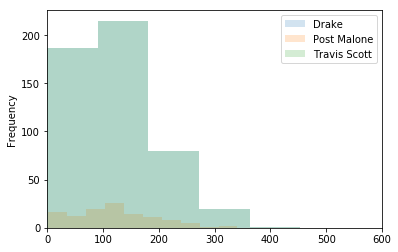

In [51]:
ajay_big_df.groupby(["artist"]).Noun.plot.hist(legend=True, alpha=.2, xlim=(0,600))

artist
Drake           AxesSubplot(0.125,0.125;0.775x0.755)
Post Malone     AxesSubplot(0.125,0.125;0.775x0.755)
Travis Scott    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Verb, dtype: object

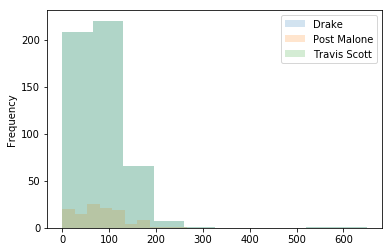

In [54]:
ajay_big_df.groupby(["artist"]).Verb.plot.hist(legend=True, alpha=.2)

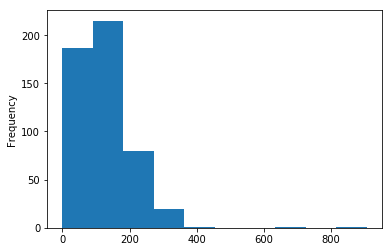

In [55]:
ajay_big_df[ajay_big_df.artist == "Drake"].Noun.plot.hist()

In [56]:
xxxtentaction = my_big_function("XXXTENTACION")
j_balvin = my_big_function("J Balvin")
ed_sheeran = my_big_function("Ed Sheeran")

In [57]:
ed_sheeran

,pos,lyrics,Noun,Verb,Adjective,Preposition,artist
0,월드카지노,월드카지노,34,29,6,24,Ed Sheeran
1,18,"I got a heart and I got a soul Believe me, I w...",118,120,22,32,Ed Sheeran
2,2002,I will always remember The day you kissed my l...,95,74,25,43,Ed Sheeran
3,2002 (Acoustic),I will always remember The day you kissed my l...,217,164,55,73,Ed Sheeran
4,2002 (BKAYE Remix),I will always remember The day you kissed my l...,69,74,13,18,Ed Sheeran
5,2002 (Jay Pryor Remix),I will always remember The day you kissed my l...,126,74,23,45,Ed Sheeran
6,2002 (KREAM Remix),I will always remember The day you kissed my l...,1,0,1,0,Ed Sheeran
7,2002 (Saweetie & Ms Banks Remix),"Ooh, I think they like me Icy on a white tee I...",265,170,53,75,Ed Sheeran
8,25 Tracks,I promised you we'd meet up in a week's time T...,341,164,54,97,Ed Sheeran
9,About Time,Kojo Funds ] Yeah Ay Where's my lighter? Gotta...,274,206,57,84,Ed Sheeran


In [58]:
top5 = drake.append(post_malone)
top5 = top5.append(xxxtentaction)
top5 = top5.append(j_balvin)
top5 = top5.append(ed_sheeran)

artist
Drake           AxesSubplot(0.125,0.125;0.775x0.755)
Ed Sheeran      AxesSubplot(0.125,0.125;0.775x0.755)
J Balvin        AxesSubplot(0.125,0.125;0.775x0.755)
Post Malone     AxesSubplot(0.125,0.125;0.775x0.755)
XXXTENTACION    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Noun, dtype: object

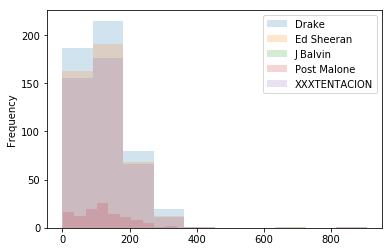

In [61]:
top5.groupby(["artist"]).Noun.plot.hist(legend=True, alpha=.2)

artist
Drake           AxesSubplot(0.125,0.125;0.775x0.755)
Ed Sheeran      AxesSubplot(0.125,0.125;0.775x0.755)
J Balvin        AxesSubplot(0.125,0.125;0.775x0.755)
Post Malone     AxesSubplot(0.125,0.125;0.775x0.755)
XXXTENTACION    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Verb, dtype: object

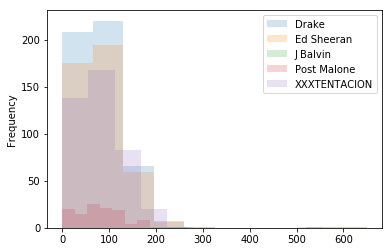

In [62]:
top5.groupby(["artist"]).Verb.plot.hist(legend=True, alpha=.2)

artist
Drake           AxesSubplot(0.125,0.125;0.775x0.755)
Ed Sheeran      AxesSubplot(0.125,0.125;0.775x0.755)
J Balvin        AxesSubplot(0.125,0.125;0.775x0.755)
Post Malone     AxesSubplot(0.125,0.125;0.775x0.755)
XXXTENTACION    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Preposition, dtype: object

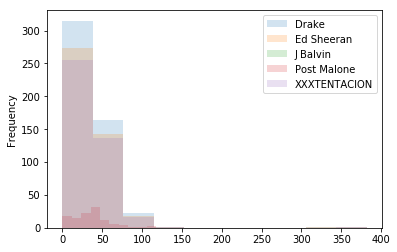

In [63]:
top5.groupby(["artist"]).Preposition.plot.hist(legend=True, alpha=.2)

artist
Drake           AxesSubplot(0.125,0.125;0.775x0.755)
Ed Sheeran      AxesSubplot(0.125,0.125;0.775x0.755)
J Balvin        AxesSubplot(0.125,0.125;0.775x0.755)
Post Malone     AxesSubplot(0.125,0.125;0.775x0.755)
XXXTENTACION    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Adjective, dtype: object

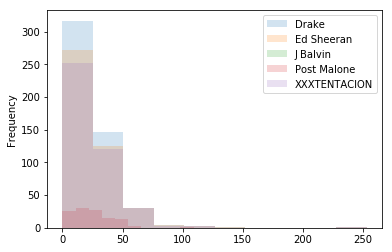

In [64]:
top5.groupby(["artist"]).Adjective.plot.hist(legend=True, alpha=.2)